In [32]:
import pandas as pd
import numpy as np
# Imports CSV
df = pd.read_csv('../raw_data/All Constituency General Election Results.csv')
# Reduces CSV to relevant election years
filtered_df = df[df['Election Year'].isin([2005, 2010, 2015, 2017, 2019])]
#Creates new index
filtered_df['new_index'] = filtered_df['Election Year'].astype(str) + '_' + filtered_df['Constituency'] + '_' + filtered_df['Boundary Year'].astype(str)
# Pivots table for the first time
pivot_votes_df = filtered_df.pivot_table(
    index=['Election Year', 'Boundary Year', 'Constituency', 'Candidate','Party', 'new_index'],
    values='Votes',
    fill_value=0
).reset_index()

/var/folders/kb/jn3km5pj6lnd7dfkgljcjy300000gn/T/ipykernel_35470/1643449388.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['new_index'] = filtered_df['Election Year'].astype(str) + '_' + filtered_df['Constituency'] + '_' + filtered_df['Boundary Year'].astype(str)


In [2]:
# Reduces CSV to relevant parties
parties_cleaned = pivot_votes_df.reset_index(drop=False)['Party'].apply(lambda x: x if x in ['British National Party', 'The Brexit Party', 'Conservative', 'Green Party', 'Liberal Democrats', 'Labour', 'Plaid Cymru', 'SNP', 'UK Independence Party (UKIP)'] else 'Other')
pivot_votes_df['Party_cleaned'] = parties_cleaned


In [3]:
#Drops irrelevant columns
pivot_votes_df.drop(columns='Party', inplace=True)
pivot_votes_df.set_index('new_index', inplace=True)


In [4]:
# Makes second pivot
pivot_table = pd.pivot_table(pivot_votes_df,
                             index=['new_index'],
                             columns=['Party_cleaned'],
                             values='Votes',
                             aggfunc='sum',
                             fill_value=0)

In [5]:
# Renames columns to follow our style
rename_dict = {
    'British National Party': 'NAT_ACTUAL_CONS',
    'The Brexit Party': 'BRX_ACTUAL_CONS',
    'Conservative': 'CON_ACTUAL_CONS',
    'Green Party': 'GRE_ACTUAL_CONS',
    'Liberal Democrats': 'LIB_ACTUAL_CONS',
    'Labour': 'LAB_ACTUAL_CONS',
    'Plaid Cymru': 'PLC_ACTUAL_CONS',
    'SNP': 'SNP_ACTUAL_CONS',
    'UK Independence Party (UKIP)': 'UKI_ACTUAL_CONS',
    'Other': 'OTH_ACTUAL_CONS'
}
pivot_table.rename(columns=rename_dict, inplace=True)

In [6]:
#Readds relevant columns
pivot_table['Election Year'] = pivot_table.index.str.split('_').str[0].astype(int)
pivot_table['Constituency'] = pivot_table.index.str.split('_').str[1]
pivot_table['Boundary Year'] = pivot_table.index.str.split('_').str[2]

In [7]:
# Reorders columns
columns_reordered = ['Constituency', 'Election Year', 'Boundary Year',
                     'CON_ACTUAL_CONS', 'GRE_ACTUAL_CONS', 'LAB_ACTUAL_CONS',
                     'LIB_ACTUAL_CONS', 'NAT_ACTUAL_CONS', 'OTH_ACTUAL_CONS', 'PLC_ACTUAL_CONS',
                     'SNP_ACTUAL_CONS', 'BRX_ACTUAL_CONS', 'UKI_ACTUAL_CONS']
df_final = pivot_table[columns_reordered]

In [8]:
# Calculates total votes
df_final['total_votes'] = df_final[['CON_ACTUAL_CONS', 'GRE_ACTUAL_CONS', 'LAB_ACTUAL_CONS', 'LIB_ACTUAL_CONS',
                  'NAT_ACTUAL_CONS', 'OTH_ACTUAL_CONS', 'PLC_ACTUAL_CONS', 'SNP_ACTUAL_CONS', 'BRX_ACTUAL_CONS',
                  'UKI_ACTUAL_CONS']].sum(axis=1)

/var/folders/kb/jn3km5pj6lnd7dfkgljcjy300000gn/T/ipykernel_35470/4202756632.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_final['total_votes'] = df_final[['CON_ACTUAL_CONS', 'GRE_ACTUAL_CONS', 'LAB_ACTUAL_CONS', 'LIB_ACTUAL_CONS',


In [9]:
# Switches to percentage
df_percentage = df_final[['CON_ACTUAL_CONS', 'GRE_ACTUAL_CONS', 'LAB_ACTUAL_CONS', 'LIB_ACTUAL_CONS', 'NAT_ACTUAL_CONS',
                    'OTH_ACTUAL_CONS', 'PLC_ACTUAL_CONS', 'SNP_ACTUAL_CONS', 'BRX_ACTUAL_CONS',
                    'UKI_ACTUAL_CONS']].div(df_final['total_votes'], axis=0) * 100

In [10]:
df_result = pd.concat([df_final[['Election Year', 'Constituency']], df_percentage], axis=1)


In [11]:
df_result.rename(columns={'Election Year': 'election_year'}, inplace=True)

In [12]:
df_result

Party_cleaned,election_year,Constituency,CON_ACTUAL_CONS,GRE_ACTUAL_CONS,LAB_ACTUAL_CONS,LIB_ACTUAL_CONS,NAT_ACTUAL_CONS,OTH_ACTUAL_CONS,PLC_ACTUAL_CONS,SNP_ACTUAL_CONS,BRX_ACTUAL_CONS,UKI_ACTUAL_CONS
new_index,,,,,,,,,,,,
2005_Aberavon_2005,2005,Aberavon,10.178049,1.694127,60.048499,13.752325,0.0,2.551156,11.775844,0.000000,0.000000,0.0
2005_Aberdeen North_2005,2005,Aberdeen North,9.433859,0.000000,42.466015,23.917672,0.0,1.886226,0.000000,22.296228,0.000000,0.0
2005_Aberdeen South_2005,2005,Aberdeen South,17.140386,0.000000,36.693016,33.454266,0.0,2.813484,0.000000,9.898849,0.000000,0.0
2005_Aberdeenshire West and Kincardine_2005,2005,Aberdeenshire West and Kincardine,28.366308,0.000000,13.133884,46.304745,0.0,0.910008,0.000000,11.285056,0.000000,0.0
2005_Airdrie and Shotts_2005,2005,Airdrie and Shotts,9.864889,0.000000,59.014416,11.436154,0.0,3.145546,0.000000,16.538995,0.000000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
2019_Yeovil_2010,2019,Yeovil,58.366520,2.748903,6.346608,31.061424,0.0,1.476544,0.000000,0.000000,0.000000,0.0
2019_Ynys Mon_2010,2019,Ynys Mon,35.453600,0.000000,30.069490,0.000000,0.0,0.000000,28.501860,0.000000,5.975049,0.0
2019_York Central_2010,2019,York Central,27.809312,4.256136,55.170185,8.380972,0.0,1.395819,0.000000,0.000000,2.987577,0.0


In [13]:
# Imports national election results to concatenante
election_results_df = pd.read_csv('../raw_data/election_results_dataframe.csv')
election_results_df.rename(columns={'Year': 'election_year'}, inplace=True)

In [14]:
election_results_df.rename(columns={'Year': 'election_year'}, inplace=True)

In [15]:
# Merges national onto constituency election results
cons_result_comp = df_result.merge(election_results_df, on='election_year', how='left')

In [16]:
# Renames national result columns
rename_dict2 = {
    'BRX_ACTUAL_PERCENTAGE': 'BRX_NAT_RESULT',
    'CON_ACTUAL_PERCENTAGE': 'CON_NAT_RESULT',
    'GRE_ACTUAL_PERCENTAGE': 'GRE_NAT_RESULT',
    'LIB_ACTUAL_PERCENTAGE': 'LIB_NAT_RESULT',
    'LABOUR_ACTUAL_PERCENTAGE': 'LAB_NAT_RESULT',
    'NAT_ACTUAL_PERCENTAGE': 'NAT_NAT_RESULT',
    'PLC_ACTUAL_PERCENTAGE': 'PLC_NAT_RESULT',
    'SNP_ACTUAL_PERCENTAGE': 'SNP_NAT_RESULT',
    'UKI_ACTUAL_PERCENTAGE': 'UKI_NAT_RESULT',
    'OTH_PERCENTAGE': 'OTH_NAT_RESULT'
}
cons_result_comp.rename(columns=rename_dict2, inplace=True)


In [17]:
cons_result_comp.columns

Index(['election_year', 'Constituency', 'CON_ACTUAL_CONS', 'GRE_ACTUAL_CONS',
       'LAB_ACTUAL_CONS', 'LIB_ACTUAL_CONS', 'NAT_ACTUAL_CONS',
       'OTH_ACTUAL_CONS', 'PLC_ACTUAL_CONS', 'SNP_ACTUAL_CONS',
       'BRX_ACTUAL_CONS', 'UKI_ACTUAL_CONS', 'Geography', 'Country',
       'NAT_NAT_RESULT', 'BRX_NAT_RESULT', 'CON_NAT_RESULT', 'GRE_NAT_RESULT',
       'LIB_NAT_RESULT', 'LAB_NAT_RESULT', 'PLC_NAT_RESULT', 'SNP_NAT_RESULT',
       'UKI_NAT_RESULT', 'OTH_NAT_RESULT'],
      dtype='object')

In [18]:
# Drops and renames columns
cons_result_comp.rename(columns={'CON_ACT_CONS': 'CON_ACTUAL_CONS'}, inplace=True)
cons_result_comp.rename(columns={'BRX_ACT_CONS': 'BRX_ACTUAL_CONS'}, inplace=True)

In [43]:
cons_result_comp.head()

,election_year,Constituency,CON_ACTUAL_CONS,GRE_ACTUAL_CONS,LAB_ACTUAL_CONS,LIB_ACTUAL_CONS,NAT_ACTUAL_CONS,OTH_ACTUAL_CONS,PLC_ACTUAL_CONS,SNP_ACTUAL_CONS,...,CON_Bias_Score,GRE_Bias_Score,LAB_Bias_Score,LIB_Bias_Score,NAT_Bias_Score,OTH_Bias_Score,PLC_Bias_Score,SNP_Bias_Score,BRX_Bias_Score,UKI_Bias_Score
0,2005,Aberavon,10.178049,1.694127,60.048499,13.752325,0.0,2.551156,11.775844,0.000000,...,-22.181546,0.745037,24.861311,-8.273230,-0.710007,-1.822608,11.131814,-1.518620,0.0,-2.232152
1,2005,Aberdeen North,9.433859,0.000000,42.466015,23.917672,0.0,1.886226,0.000000,22.296228,...,-22.925736,-0.949090,7.278828,1.892117,-0.710007,-2.487539,-0.644030,20.777608,0.0,-2.232152
2,2005,Aberdeen South,17.140386,0.000000,36.693016,33.454266,0.0,2.813484,0.000000,9.898849,...,-15.219210,-0.949090,1.505828,11.428711,-0.710007,-1.560281,-0.644030,8.380230,0.0,-2.232152
3,2005,Aberdeenshire West and Kincardine,28.366308,0.000000,13.133884,46.304745,0.0,0.910008,0.000000,11.285056,...,-3.993287,-0.949090,-22.053303,24.279190,-0.710007,-3.463757,-0.644030,9.766436,0.0,-2.232152
4,2005,Airdrie and Shotts,9.864889,0.000000,59.014416,11.436154,0.0,3.145546,0.000000,16.538995,...,-22.494706,-0.949090,23.827229,-10.589401,-0.710007,-1.228219,-0.644030,15.020376,0.0,-2.232152


In [20]:
# Calculates bias score
for index, row in cons_result_comp.iterrows():
    bias_scores = {}
    # Loop through each party
    for party in ['CON', 'GRE', 'LAB', 'LIB', 'NAT', 'OTH', 'PLC', 'SNP', 'BRX', 'UKI']:
        # Calculate the absolute difference between the constituency result and national result for each party
        bias_scores[party] = (row[f'{party}_ACTUAL_CONS'] - row[f'{party}_NAT_RESULT'])
    # Assign the bias scores to the respective columns
    for party, score in bias_scores.items():
        cons_result_comp.loc[index, f'{party}_Bias_Score'] = score

In [21]:
# Filters dataframe
biases_df = cons_result_comp.filter(like='Bias')

In [46]:
biases_df.describe()

,CON_Bias_Score,GRE_Bias_Score,LAB_Bias_Score,LIB_Bias_Score,NAT_Bias_Score,OTH_Bias_Score,PLC_Bias_Score,SNP_Bias_Score,BRX_Bias_Score,UKI_Bias_Score
count,3246.000000,3246.000000,3246.000000,3246.000000,3246.000000,3246.000000,3246.000000,3246.000000,3246.000000,3246.000000
mean,-1.232958,-0.071255,0.998133,-0.471982,0.030750,0.353357,0.177552,0.133610,0.062705,0.020087
std,16.448106,2.500459,17.390767,9.891426,1.376979,16.561712,4.006806,10.721195,1.839336,3.337211
min,-43.631688,-3.621042,-39.989322,-23.028931,-1.901011,-4.373764,-0.644030,-4.738156,-2.012681,-12.643503
25%,-14.544078,-0.949090,-13.115412,-5.805940,-0.710007,-3.682069,-0.591942,-3.881238,0.000000,-1.490944
50%,1.502866,-0.489307,1.830862,-3.555776,-0.005431,-3.246263,-0.557103,-3.035607,0.000000,-0.071281
75%,12.847196,0.655347,13.784523,1.889821,-0.001593,-2.240947,-0.510710,-1.518620,0.000000,1.132025
max,33.092119,54.546837,52.600146,45.386136,16.296843,96.732177,50.698024,57.175339,28.426578,31.788374


In [57]:
biases_df.head()

,CON_Bias_Score,GRE_Bias_Score,LAB_Bias_Score,LIB_Bias_Score,NAT_Bias_Score,OTH_Bias_Score,PLC_Bias_Score,SNP_Bias_Score,BRX_Bias_Score,UKI_Bias_Score
0,-22.181546,0.745037,24.861311,-8.273230,-0.710007,-1.822608,11.131814,-1.518620,0.0,-2.232152
1,-22.925736,-0.949090,7.278828,1.892117,-0.710007,-2.487539,-0.644030,20.777608,0.0,-2.232152
2,-15.219210,-0.949090,1.505828,11.428711,-0.710007,-1.560281,-0.644030,8.380230,0.0,-2.232152
3,-3.993287,-0.949090,-22.053303,24.279190,-0.710007,-3.463757,-0.644030,9.766436,0.0,-2.232152
4,-22.494706,-0.949090,23.827229,-10.589401,-0.710007,-1.228219,-0.644030,15.020376,0.0,-2.232152


In [45]:
bias_scores

{'CON': 20.77734010589699,
 'GRE': 0.5621816679105165,
 'LAB': -10.854394721147425,
 'LIB': -3.552517014836771,
 'NAT': -0.0015932577331497,
 'OTH': -0.487010901531455,
 'PLC': -0.4788051891592119,
 'SNP': -3.881238318648235,
 'BRX': -2.01268126938405,
 'UKI': -0.0712811013672119}

In [44]:
biases_df.head()

,CON_Bias_Score,GRE_Bias_Score,LAB_Bias_Score,LIB_Bias_Score,NAT_Bias_Score,OTH_Bias_Score,PLC_Bias_Score,SNP_Bias_Score,BRX_Bias_Score,UKI_Bias_Score
0,-22.181546,0.745037,24.861311,-8.273230,-0.710007,-1.822608,11.131814,-1.518620,0.0,-2.232152
1,-22.925736,-0.949090,7.278828,1.892117,-0.710007,-2.487539,-0.644030,20.777608,0.0,-2.232152
2,-15.219210,-0.949090,1.505828,11.428711,-0.710007,-1.560281,-0.644030,8.380230,0.0,-2.232152
3,-3.993287,-0.949090,-22.053303,24.279190,-0.710007,-3.463757,-0.644030,9.766436,0.0,-2.232152
4,-22.494706,-0.949090,23.827229,-10.589401,-0.710007,-1.228219,-0.644030,15.020376,0.0,-2.232152


In [22]:
# Calculates bias per constituency
average_biases_per_constituency = biases_df.groupby(cons_result_comp['Constituency']).mean()

In [23]:
average_biases_per_constituency

,CON_Bias_Score,GRE_Bias_Score,LAB_Bias_Score,LIB_Bias_Score,NAT_Bias_Score,OTH_Bias_Score,PLC_Bias_Score,SNP_Bias_Score,BRX_Bias_Score,UKI_Bias_Score
Constituency,,,,,,,,,,
Aberavon,-23.307236,-0.858548,23.223869,-6.440048,0.297851,-0.733584,8.918441,-2.965755,1.564677,0.300333
Aberconwy,2.292982,-1.576494,0.884625,-4.312122,-0.480612,-3.405292,11.439902,-3.327539,-0.503170,-1.012279
Aberdeen North,-22.896858,-1.933300,-2.132344,-2.494376,-0.189630,-2.238113,-0.556518,36.282878,0.136314,-3.978052
Aberdeen South,-10.489169,-1.933300,-7.552604,2.300544,-0.280639,-2.417282,-0.556518,24.940048,-0.402536,-3.608543
Aberdeenshire West and Kincardine,-2.645865,-1.933300,-23.964078,10.929087,-0.299475,-3.136656,-0.556518,25.447191,-0.402536,-3.437849
...,...,...,...,...,...,...,...,...,...,...
Ynys Mon,-14.653125,-1.933300,0.868470,-10.812434,-0.526491,0.853511,28.183887,-2.965755,0.792474,0.192765
York Central,-11.617521,2.294539,17.793366,-0.908316,0.149188,-2.784202,-0.534640,-3.327539,0.243724,-1.308598
York Outer,8.438650,-0.516706,-5.411639,6.557452,-0.032207,-3.207015,-0.534640,-3.327539,-0.503170,-1.463186


In [67]:
np.sum(average_biases_per_constituency.LIB_Bias_Score > 50)

0

In [61]:
OTH_high_bias_const = average_biases_per_constituency[average_biases_per_constituency.OTH_Bias_Score > 50]

In [62]:
OTH_high_bias_const.head()

,CON_Bias_Score,GRE_Bias_Score,LAB_Bias_Score,LIB_Bias_Score,NAT_Bias_Score,OTH_Bias_Score,PLC_Bias_Score,SNP_Bias_Score,BRX_Bias_Score,UKI_Bias_Score
Constituency,,,,,,,,,,
Antrim East,-36.847217,-1.9333,-33.339512,-14.367627,-0.526491,92.731739,-0.556518,-2.965755,-0.402536,-1.792781
Antrim North,-38.064157,-1.9333,-33.339512,-14.367627,-0.526491,95.493961,-0.556518,-2.965755,-0.402536,-3.338063
Antrim South,-38.012530,-1.9333,-33.339512,-14.367627,-0.526491,96.082323,-0.556518,-2.965755,-0.402536,-3.978052
Belfast East,-37.185283,-1.9333,-33.339512,-14.367627,-0.526491,95.255076,-0.556518,-2.965755,-0.402536,-3.978052
Belfast North,-38.239784,-1.9333,-33.339512,-14.367627,-0.526491,96.309577,-0.556518,-2.965755,-0.402536,-3.978052


In [70]:
average_biases_per_constituency.loc['Clacton']

CON_Bias_Score    16.084688
GRE_Bias_Score    -0.088510
LAB_Bias_Score   -12.802872
LIB_Bias_Score    -6.798284
NAT_Bias_Score     0.664368
OTH_Bias_Score    -1.288605
PLC_Bias_Score    -0.534640
SNP_Bias_Score    -3.327539
BRX_Bias_Score    -0.503170
UKI_Bias_Score     8.594564
Name: Clacton, dtype: float64

<Axes: xlabel='Constituency'>

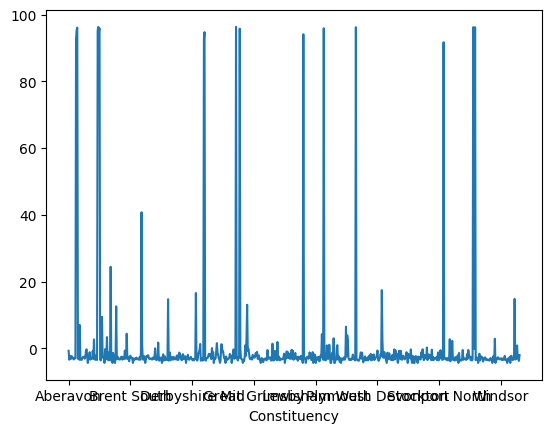

In [63]:
average_biases_per_constituency.OTH_Bias_Score.plot()

In [24]:
# average_biases_per_constituency.to_csv('../processed_data/constituency_bias_dataframe.csv', index=True)